나중에 이미지에서 한글 깨지지 않으려면 아래의 코드 실행 후 런타임을 다시 연결해야 함.

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (27.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and direc

데이터 분류기   
데이터 이해

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('/content/cmm_data.csv', skiprows=0, encoding='cp949')
df.head()

,파일명,"평면1,평면도","원1(I) <상>,D","원2(I) <중>,D","원3(I) <하>,D","원통1(I) <- 원1, 원2, 원3의 측정점 병합,D","원통1(I) <- 원1, 원2, 원3의 측정점 병합,원통도","원통1(I) <- 원1, 원2, 원3의 측정점 병합,직각도","점2 <- 점1의 되부름 <열전 관리치수(Spec : 116.6±0.1)>,X","점2 <- 점1의 되부름 <열전 관리치수(Spec : 116.6±0.1)>,Y",...,"점28 <- 점27의 되부름 <소재 원점>,Y","각도2 <- 각도[XYPLAN]:직선23와 직선24,Ang","점29 <- 점13의 되부름 <소재원점>,X","점29 <- 점13의 되부름 <소재원점>,Y","점30 <- 점18의 되부름 <소재원점>,X","점30 <- 점18의 되부름 <소재원점>,Y","직선25 <- 직선18의 되부름,X/Y","직선26 <- 직선16의 되부름,X/Y","거리4 <- XAXIS[평균]:점32와 점31 <소재기준>,DS",품질상태
0,240306_일상검사_주_초_1-5-1,0.051732,-0.004,-0.001,-0.005,-0.004,0.051732,0.051732,0.073,0.007,...,0.003,-0.164,0.035,0.062,0.047,0.039,0.139,0.588,0.005,0
1,240304_일상검사_주_초_1-6-1,0.024804,-0.001,0.009,-0.011,-0.001,0.024804,0.024804,0.042,0.004,...,0.003,-0.128,0.039,0.068,0.049,0.048,0.019,0.188,0.005,0
2,240305_일상검사_야_중_1-5-1_OK,0.035143,0.003,0.006,-0.001,0.003,0.035143,0.035143,0.090,0.008,...,0.004,-0.164,0.034,0.075,0.054,0.045,-0.106,0.361,0.021,1
3,240305_일상검사_야_중_2-3-1_OK,0.021643,0.014,0.019,0.017,0.017,0.021643,0.021643,0.012,0.001,...,0.002,-0.209,0.037,0.062,0.057,0.006,0.046,0.253,0.014,1
4,240308_일상검사_주_초_2-3-1_,0.032518,0.011,0.013,0.005,0.009,0.032518,0.032518,0.080,0.007,...,0.003,-0.182,0.042,0.076,0.058,0.029,-0.164,0.333,0.002,0


In [7]:
# 데이터의 수 (레코드수, 특징수)
df.shape

(137, 67)

In [8]:
df.dtypes # 데이터 유형

파일명                                     object
평면1,평면도                                float64
원1(I) <상>,D                            float64
원2(I) <중>,D                            float64
원3(I) <하>,D                            float64
                                        ...   
점30 <- 점18의 되부름 <소재원점>,Y               float64
직선25 <- 직선18의 되부름,X/Y                  float64
직선26 <- 직선16의 되부름,X/Y                  float64
거리4 <- XAXIS[평균]:점32와 점31 <소재기준>,DS    float64
품질상태                                     int64
Length: 67, dtype: object

In [9]:
# 기본적인 통계
df.describe()

,"평면1,평면도","원1(I) <상>,D","원2(I) <중>,D","원3(I) <하>,D","원통1(I) <- 원1, 원2, 원3의 측정점 병합,D","원통1(I) <- 원1, 원2, 원3의 측정점 병합,원통도","원통1(I) <- 원1, 원2, 원3의 측정점 병합,직각도","점2 <- 점1의 되부름 <열전 관리치수(Spec : 116.6±0.1)>,X","점2 <- 점1의 되부름 <열전 관리치수(Spec : 116.6±0.1)>,Y","각도1 <- 각도[XYPLAN]:직선2와 직선3,Ang",...,"점28 <- 점27의 되부름 <소재 원점>,Y","각도2 <- 각도[XYPLAN]:직선23와 직선24,Ang","점29 <- 점13의 되부름 <소재원점>,X","점29 <- 점13의 되부름 <소재원점>,Y","점30 <- 점18의 되부름 <소재원점>,X","점30 <- 점18의 되부름 <소재원점>,Y","직선25 <- 직선18의 되부름,X/Y","직선26 <- 직선16의 되부름,X/Y","거리4 <- XAXIS[평균]:점32와 점31 <소재기준>,DS",품질상태
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,137.000000
mean,0.024907,0.001088,0.005759,-0.000131,0.003746,0.026346,0.027199,0.062190,0.005423,0.081679,...,0.003211,-0.158699,0.041812,0.066752,0.052211,0.023353,-0.001158,0.221759,0.009090,0.437956
std,0.013226,0.007677,0.006867,0.008605,0.010488,0.013089,0.019536,0.036027,0.003968,0.244030,...,0.001315,0.088416,0.008604,0.012868,0.009917,0.026045,0.112267,0.170517,0.011824,0.497956
min,-0.015929,-0.021000,-0.017000,-0.041000,-0.015000,-0.015929,-0.015929,-0.068000,-0.020000,-2.111000,...,0.000000,-0.492000,0.012000,0.039000,0.017000,-0.070000,-0.309000,-0.258000,-0.016000,0.000000
25%,0.017518,-0.003000,0.001000,-0.004000,-0.002000,0.018786,0.018571,0.039000,0.004000,0.023000,...,0.003000,-0.190000,0.038000,0.057000,0.047000,0.007000,-0.073000,0.134000,0.001000,0.000000
50%,0.024804,0.001000,0.005000,0.000000,0.002000,0.026196,0.025786,0.060000,0.005000,0.125000,...,0.003000,-0.164000,0.042000,0.067000,0.052000,0.025000,0.007000,0.230000,0.008000,0.000000
75%,0.032518,0.006000,0.011000,0.005000,0.008000,0.032696,0.032661,0.081000,0.007000,0.177000,...,0.004000,-0.128000,0.046000,0.076000,0.056000,0.040000,0.067000,0.303000,0.015000,1.000000
max,0.078179,0.020000,0.021000,0.021000,0.068026,0.078179,0.178000,0.216000,0.020000,0.549000,...,0.009000,0.426000,0.063000,0.100000,0.107000,0.081000,0.343000,1.063000,0.047000,1.000000


데이터 전처리

In [10]:
# 문자열 카테고리값으로 변환
categorical_columns = df.select_dtypes(include=['float64']).columns
df[categorical_columns] = df[categorical_columns].astype('category')

df.dtypes

파일명                                      object
평면1,평면도                                category
원1(I) <상>,D                            category
원2(I) <중>,D                            category
원3(I) <하>,D                            category
                                         ...   
점30 <- 점18의 되부름 <소재원점>,Y               category
직선25 <- 직선18의 되부름,X/Y                  category
직선26 <- 직선16의 되부름,X/Y                  category
거리4 <- XAXIS[평균]:점32와 점31 <소재기준>,DS    category
품질상태                                      int64
Length: 67, dtype: object

In [12]:
# 모든 카테고리값을 출력
category_values = {col: df[col].cat.categories for col in categorical_columns}

# 특정 카테고리값을 출력
df['평면1,평면도'].cat.categories

Index([-0.0159285714285714, -0.0143749999999999,              -0.005,
       -0.0023571428571428,              -0.002,              -0.001,
                       0.0,  0.0075357142857142,  0.0077857142857142,
        0.0085535714285714,
       ...
        0.0396964285714285,  0.0405714285714285,  0.0447321428571428,
        0.0454464285714285,  0.0482857142857142,  0.0487142857142857,
        0.0517321428571428,  0.0545892857142857,  0.0676785714285714,
        0.0781785714285714],
      dtype='float64', length=131)

In [13]:
# 카테고리 데이터에 대한 표현 통계
df[categorical_columns].describe()

,"평면1,평면도","원1(I) <상>,D","원2(I) <중>,D","원3(I) <하>,D","원통1(I) <- 원1, 원2, 원3의 측정점 병합,D","원통1(I) <- 원1, 원2, 원3의 측정점 병합,원통도","원통1(I) <- 원1, 원2, 원3의 측정점 병합,직각도","점2 <- 점1의 되부름 <열전 관리치수(Spec : 116.6±0.1)>,X","점2 <- 점1의 되부름 <열전 관리치수(Spec : 116.6±0.1)>,Y","각도1 <- 각도[XYPLAN]:직선2와 직선3,Ang",...,"점28 <- 점27의 되부름 <소재 원점>,X","점28 <- 점27의 되부름 <소재 원점>,Y","각도2 <- 각도[XYPLAN]:직선23와 직선24,Ang","점29 <- 점13의 되부름 <소재원점>,X","점29 <- 점13의 되부름 <소재원점>,Y","점30 <- 점18의 되부름 <소재원점>,X","점30 <- 점18의 되부름 <소재원점>,Y","직선25 <- 직선18의 되부름,X/Y","직선26 <- 직선16의 되부름,X/Y","거리4 <- XAXIS[평균]:점32와 점31 <소재기준>,DS"
count,137.000000,137.000,137.000,137.000,137.000,137.000000,137.000000,137.000,137.000,137.000,...,133.000,133.000,133.000,133.000,133.000,133.000,133.000,133.000,133.000,133.000
unique,131.000000,33.000,30.000,34.000,34.000,131.000000,131.000000,83.000,18.000,111.000,...,42.000,9.000,87.000,34.000,49.000,36.000,74.000,110.000,109.000,42.000
top,0.013679,0.001,0.012,-0.001,0.002,0.015839,0.013679,0.039,0.004,0.162,...,0.029,0.003,-0.175,0.044,0.065,0.052,0.039,-0.017,0.239,-0.001
freq,2.000000,14.000,10.000,10.000,16.000,2.000000,2.000000,4.000,20.000,4.000,...,11.000,53.000,4.000,13.000,7.000,11.000,6.000,4.000,3.000,7.000


데이터 탐색 (상관관계 분석)

In [14]:
# 카테고리 값을 숫자로 변환
df_copy = df.copy()
for col in categorical_columns:
    df_copy[col] = df_copy[col].cat.codes

In [20]:
df_copy = df_copy.select_dtypes(include=['number'])
df_copy.corr()

,"평면1,평면도","원1(I) <상>,D","원2(I) <중>,D","원3(I) <하>,D","원통1(I) <- 원1, 원2, 원3의 측정점 병합,D","원통1(I) <- 원1, 원2, 원3의 측정점 병합,원통도","원통1(I) <- 원1, 원2, 원3의 측정점 병합,직각도","점2 <- 점1의 되부름 <열전 관리치수(Spec : 116.6±0.1)>,X","점2 <- 점1의 되부름 <열전 관리치수(Spec : 116.6±0.1)>,Y","각도1 <- 각도[XYPLAN]:직선2와 직선3,Ang",...,"점28 <- 점27의 되부름 <소재 원점>,Y","각도2 <- 각도[XYPLAN]:직선23와 직선24,Ang","점29 <- 점13의 되부름 <소재원점>,X","점29 <- 점13의 되부름 <소재원점>,Y","점30 <- 점18의 되부름 <소재원점>,X","점30 <- 점18의 되부름 <소재원점>,Y","직선25 <- 직선18의 되부름,X/Y","직선26 <- 직선16의 되부름,X/Y","거리4 <- XAXIS[평균]:점32와 점31 <소재기준>,DS",품질상태
"평면1,평면도",1.000000,-0.044398,0.073833,-0.015699,-0.148233,0.866547,0.903749,0.422752,0.529174,0.295549,...,0.121694,0.263032,-0.161714,0.370833,0.041519,0.171273,0.338514,0.682603,-0.061858,-0.075360
"원1(I) <상>,D",-0.044398,1.000000,0.741344,0.847328,0.779763,-0.110345,-0.094728,0.032884,0.093390,0.132596,...,-0.074636,-0.125048,0.085082,0.062017,0.072137,-0.024223,-0.033496,-0.159376,0.037780,0.527847
"원2(I) <중>,D",0.073833,0.741344,1.000000,0.745100,0.641557,-0.076579,-0.035382,0.160207,0.284557,0.269656,...,0.099357,0.135224,0.106489,0.136631,0.154796,0.009297,-0.033139,-0.065637,-0.013422,0.353717
"원3(I) <하>,D",-0.015699,0.847328,0.745100,1.000000,0.828825,-0.066682,-0.049886,0.005688,0.061158,0.163282,...,-0.061069,-0.064810,0.045216,0.055677,0.126551,0.055963,-0.050394,-0.087555,0.018827,0.485249
"원통1(I) <- 원1, 원2, 원3의 측정점 병합,D",-0.148233,0.779763,0.641557,0.828825,1.000000,0.059977,0.007920,0.185749,0.005610,0.089305,...,-0.308364,-0.205526,-0.158544,-0.112461,-0.114236,-0.163053,-0.201431,-0.260777,-0.157412,0.380434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"점30 <- 점18의 되부름 <소재원점>,Y",0.171273,-0.024223,0.009297,0.055963,-0.163053,0.002280,0.047753,-0.306212,-0.143188,0.225518,...,0.303314,0.453500,-0.101991,0.208569,0.248995,1.000000,-0.083476,0.182618,0.346119,0.219551
"직선25 <- 직선18의 되부름,X/Y",0.338514,-0.033496,-0.033139,-0.050394,-0.201431,0.194333,0.232724,-0.180019,-0.042935,-0.035916,...,0.065421,0.015207,0.254355,-0.008988,0.061442,-0.083476,1.000000,0.036618,0.070565,-0.097093
"직선26 <- 직선16의 되부름,X/Y",0.682603,-0.159376,-0.065637,-0.087555,-0.260777,0.539743,0.579189,0.196199,0.296648,0.032626,...,0.100833,0.124040,-0.346867,0.246605,0.086707,0.182618,0.036618,1.000000,-0.174285,-0.068462
"거리4 <- XAXIS[평균]:점32와 점31 <소재기준>,DS",-0.061858,0.037780,-0.013422,0.018827,-0.157412,-0.228343,-0.182311,-0.362585,-0.197826,0.130580,...,0.305859,0.256044,0.361144,0.577164,0.248876,0.346119,0.070565,-0.174285,1.000000,0.026330


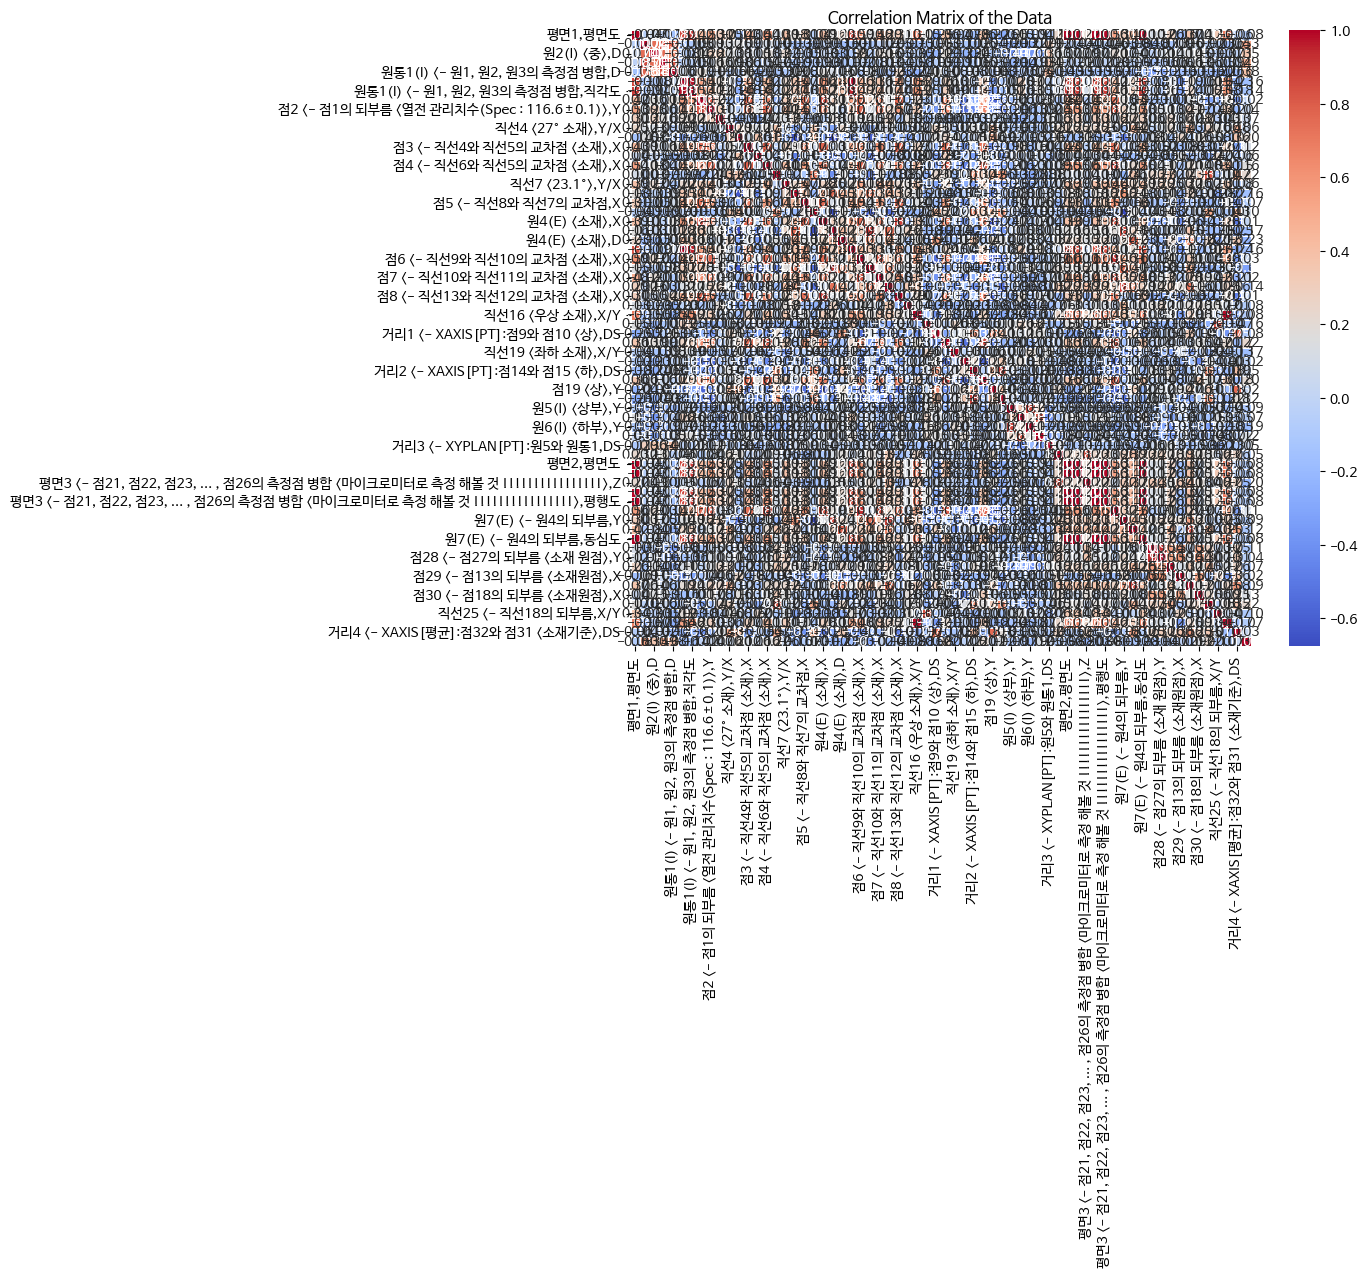

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')  # 나눔 바른 고딕 폰트를 사용하도록 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호가 깨지지 않도록 설정

# Calculate the correlation matrix
correlation_matrix = df_copy.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of the Data')
plt.show()



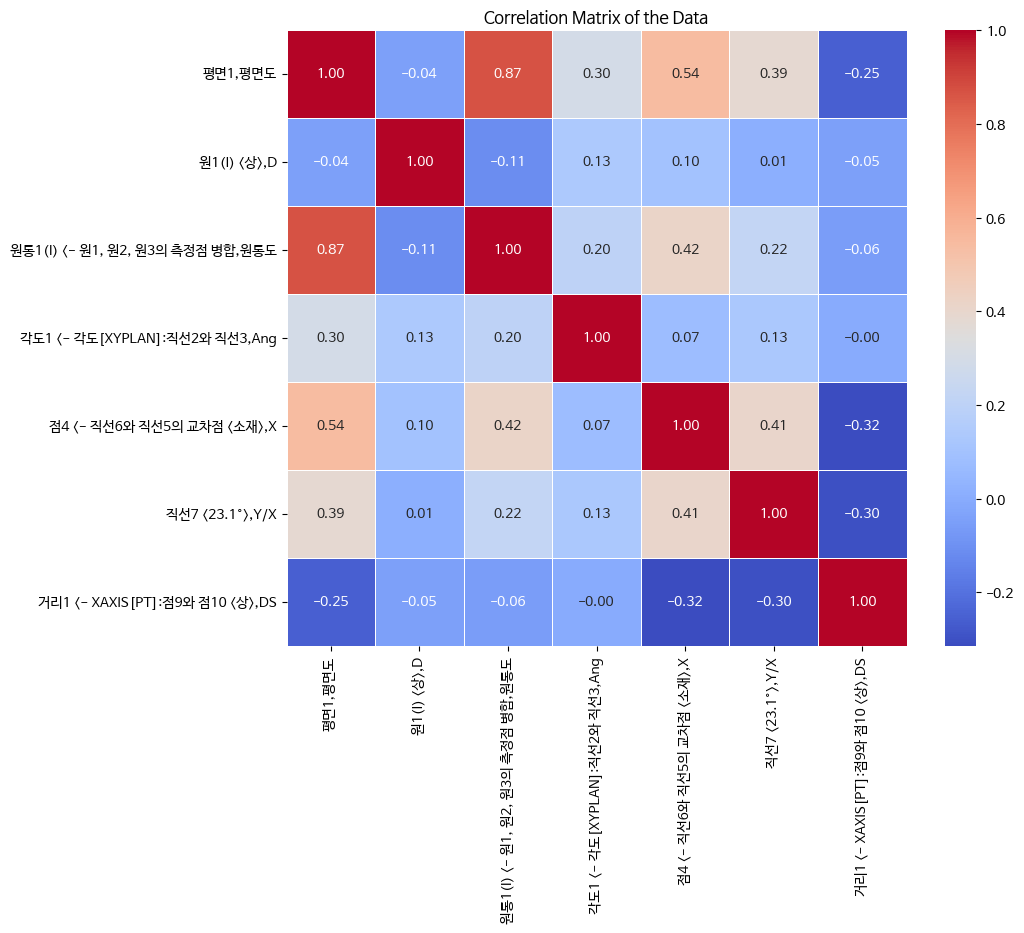

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')  # 나눔 바른 고딕 폰트를 사용하도록 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호가 깨지지 않도록 설정

# 표시할 행과 열의 인덱스 설정
columns_to_display = ['평면1,평면도', '원1(I) <상>,D','원통1(I) <- 원1, 원2, 원3의 측정점 병합,원통도','각도1 <- 각도[XYPLAN]:직선2와 직선3,Ang','점4 <- 직선6와 직선5의 교차점 <소재>,X','직선7 <23.1°>,Y/X','거리1 <- XAXIS[PT]:점9와 점10 <상>,DS']  # 예시로 표시할 항목들을 지정합니다.

# 필요한 열만 있는 DataFrame 생성
df_display = df_copy[columns_to_display]

# Calculate the correlation matrix
correlation_matrix = df_display.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of the Data')
plt.show()


랜덤 포레스트 분류기
- 일부 컬럼만 사용해서 분류기 만들어보기

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [26]:
# Prepare the data
X = df_copy.drop(['품질상태'], axis=1)  # Features
y = df_copy['품질상태']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy


0.6785714285714286

In [28]:
print(class_report)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        19
           1       0.50      0.56      0.53         9

    accuracy                           0.68        28
   macro avg       0.64      0.65      0.64        28
weighted avg       0.69      0.68      0.68        28



결과 예측

In [29]:
from sklearn.metrics import confusion_matrix
import numpy as np

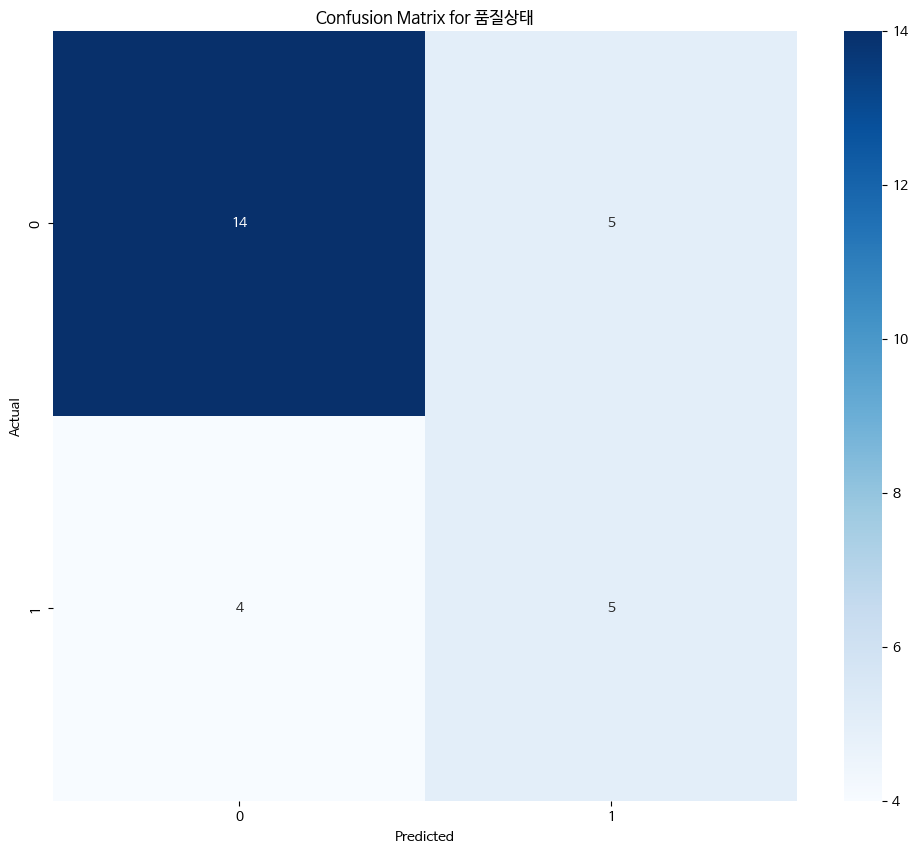

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 예측값과 실제값을 기반으로 혼동 행렬 생성
cm_rel_blk = confusion_matrix(y_test, y_pred)

# 고유한 레이블 가져오기
unique_labels = np.unique(np.concatenate((y_test, y_pred)))

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(cm_rel_blk, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Confusion Matrix for 품질상태')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Feature Importance & Permutation Importance & 개별 트리 출력


Top 5 Feature Importance:
Feature 원1(I) <상>,D: 0.07820908944823597
Feature 원3(I) <하>,D: 0.0766777746530324
Feature 원통1(I) <- 원1, 원2, 원3의 측정점 병합,D: 0.05269755487308424
Feature 원2(I) <중>,D: 0.04554977091366879
Feature 원6(I) <하부>,Y: 0.03195147750943853

Bottom 5 Feature Importance:
Feature 점28 <- 점27의 되부름 <소재 원점>,Y: 0.0030653061890695645
Feature 점2 <- 점1의 되부름 <열전 관리치수(Spec : 116.6±0.1)>,Y: 0.003224735636638046
Feature 직선8 <6°>,Y/X: 0.004442155549590575
Feature 점5 <- 직선8와 직선7의 교차점,Y: 0.004617193246804281
Feature 직선16 <우상 소재>,X/Y: 0.005387200076929634

Top 5 Permutation Importance:
Feature 점13 <- 점11와 점12의 중점 <열전관리_상>,X: 0.024999999999999988
Feature 직선5 <7.5° 소재>,Y/X: 0.023809523809523798
Feature 점28 <- 점27의 되부름 <소재 원점>,Y: 0.022619047619047608
Feature 직선7 <23.1°>,Y/X: 0.01666666666666666
Feature 직선25 <- 직선18의 되부름,X/Y: 0.013095238095238089

Bottom 5 Permutation Importance:
Feature 원1(I) <상>,D: -0.051190476190476154
Feature 원6(I) <하부>,Y: -0.04166666666666665
Feature 원3(I) <하>,D: -0.041666666

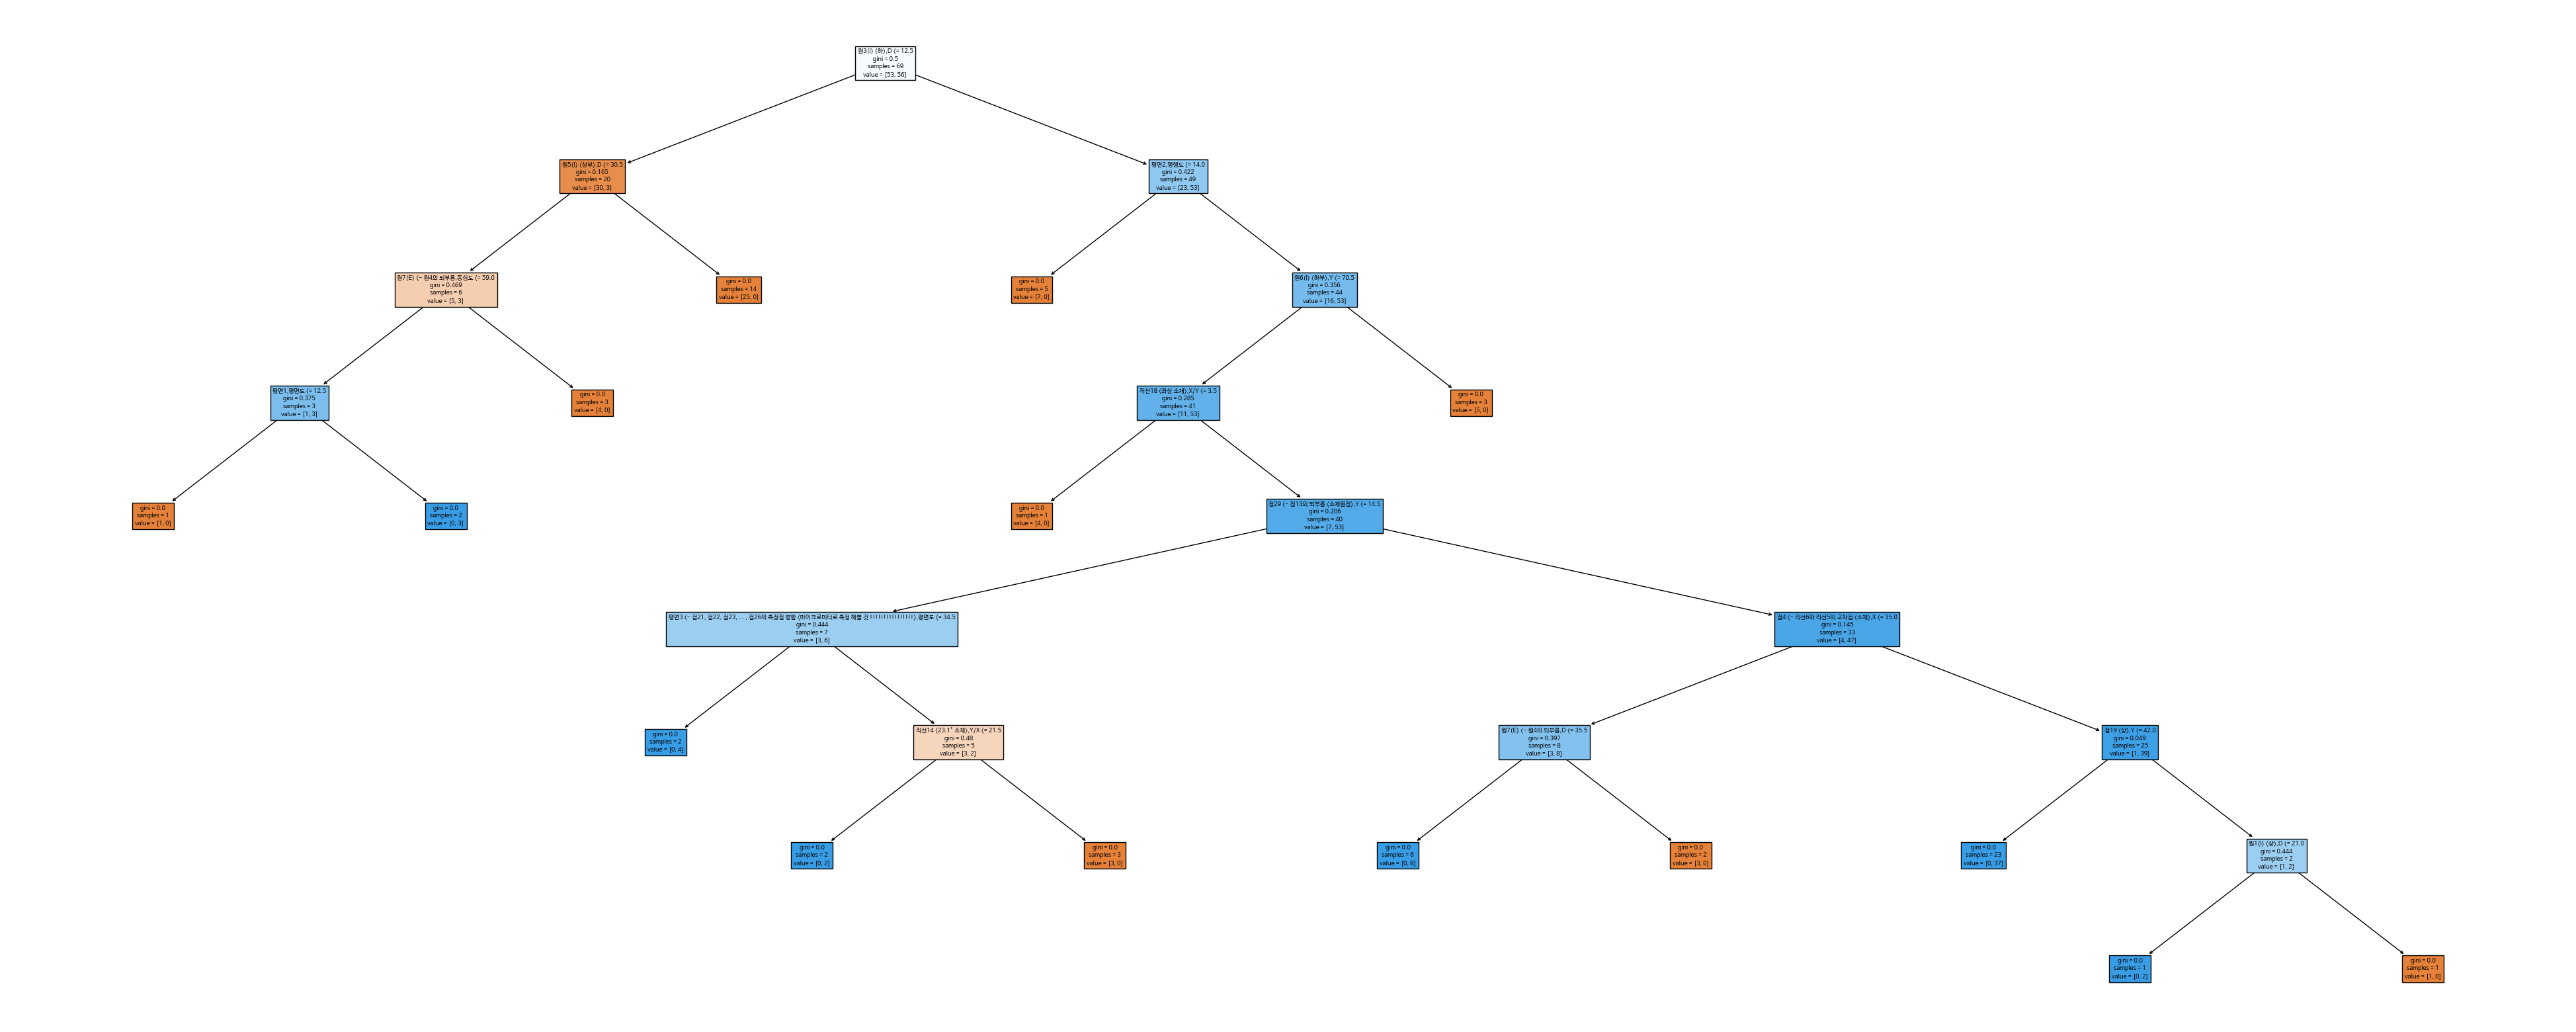

In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from matplotlib import rc

# Feature Importance
print("\nTop 5 Feature Importance:")
feature_importances = rf_classifier.feature_importances_
indices = feature_importances.argsort()[-5:][::-1]  # Get indices of top 5 features
for i in indices:
    print(f"Feature {X.columns[i]}: {feature_importances[i]}")

print("\nBottom 5 Feature Importance:")
bottom_indices = feature_importances.argsort()[:5]  # Get indices of bottom 5 features
for i in bottom_indices:
    print(f"Feature {X.columns[i]}: {feature_importances[i]}")

# Permutation Importance
print("\nTop 5 Permutation Importance:")
perm_importance = permutation_importance(rf_classifier, X_test, y_test, n_repeats=30, random_state=42)
perm_indices = perm_importance.importances_mean.argsort()[-5:][::-1]  # Get indices of top 5 features
for i in perm_indices:
    print(f"Feature {X.columns[i]}: {perm_importance.importances_mean[i]}")

print("\nBottom 5 Permutation Importance:")
perm_bottom_indices = perm_importance.importances_mean.argsort()[:5]  # Get indices of bottom 5 features
for i in perm_bottom_indices:
    print(f"Feature {X.columns[i]}: {perm_importance.importances_mean[i]}")

# 랜덤 포레스트의 개별 트리 확인
print("\nIndividual Trees:")
plt.figure(figsize=(50, 20))
plot_tree(rf_classifier.estimators_[0], feature_names=X.columns, filled=True)
plt.show()
